In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

In [9]:
scaled_data = pd.read_csv('housing_scaled.csv')
x= scaled_data.drop(columns=['price'])  
y= scaled_data['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
evaluate_model(svr, X_train, X_test, y_train, y_test)


{'MAE': 0.4682071495926968,
 'MSE': 0.4311746561856418,
 'R2 Score': 0.6503532248410444}

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ........................C=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ........................C=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ........................C=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ........................C=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ........................C=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ......................C=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.1, gamma=0.01; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.

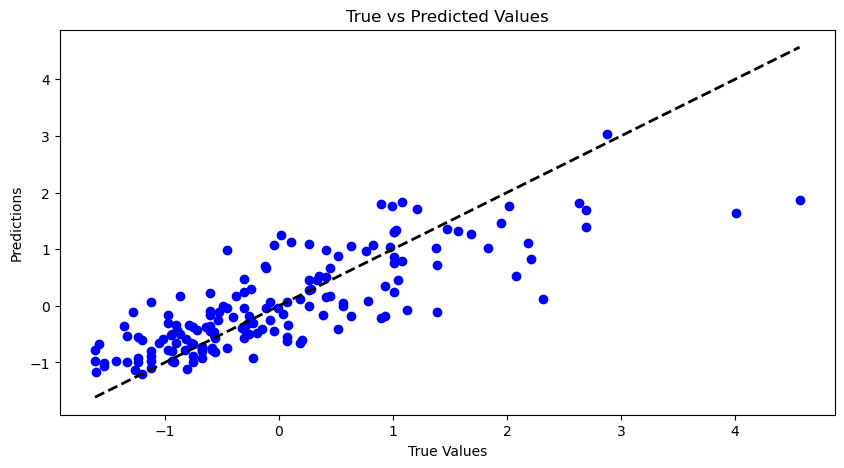

In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.2, 0.5, 0.3]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, refit=True, verbose=2, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model
evaluation_results = evaluate_model(best_estimator, X_train, X_test, y_train, y_test)
print("Best Parameters:", best_params)
print("Evaluation Results:", evaluation_results)

# Plotting the results
plt.figure(figsize=(10, 5))

# Plot true vs predicted values
y_pred = best_estimator.predict(X_test)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

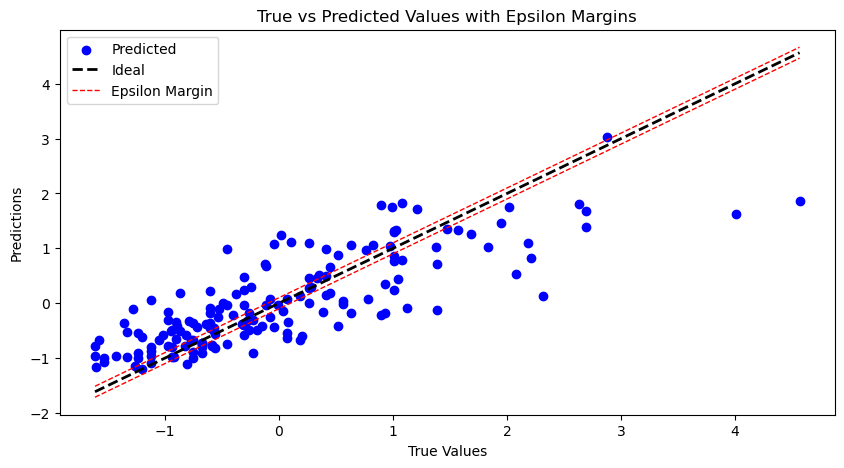

In [14]:
# Plotting the results with epsilon margins
plt.figure(figsize=(10, 5))

# Plot true vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')

# Plot epsilon margins
epsilon = best_params['epsilon']
plt.plot([y_test.min(), y_test.max()], [y_test.min() + epsilon, y_test.max() + epsilon], 'r--', lw=1, label='Epsilon Margin')
plt.plot([y_test.min(), y_test.max()], [y_test.min() - epsilon, y_test.max() - epsilon], 'r--', lw=1)

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values with Epsilon Margins')
plt.legend()
plt.show()